In [1]:
#lets import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

In [2]:
#loading csv to pandas dataframe
house = pd.read_csv(r"C:\Users\bharathi.v04\Downloads\DS\Housetrain.csv")

In [3]:
#print the first 5 rows of dataset
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#finding total null values
house.isnull().sum().sum()

6965

In [7]:
#finding total null values
house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
#lets drop the columns which are not necessary
house = house.drop(columns=['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [9]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
# now we will select numerical and catergorical columns
object_columns_house = house.select_dtypes(include=['object'])
numerical_columns_house = house.select_dtypes(exclude=['object'])

In [11]:
object_columns_house.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [12]:
numerical_columns_house.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [13]:
#number of null values in each features
null_counts = object_columns_house.isnull().sum()
print("The number of null value in each column:\n{}".format(null_counts))

The number of null value in each column:
MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64


In [14]:
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']
object_columns_house[columns_None] = object_columns_house[columns_None].fillna('None')

In [15]:
columns_with_lowNa = ['MasVnrType','Electrical']
#fill missing values for each column(using its own most frequent value)
object_columns_house[columns_with_lowNa] = object_columns_house[columns_with_lowNa].fillna(object_columns_house.mode(0).iloc[0])

** Now we have a clean categorical features**


In the next step we will deal with the **numerical** features black

In [16]:
null_counts = numerical_columns_house.isnull().sum()
print("Number of null values in each columns:\n{}".format(null_counts))

Number of null values in each columns:
Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64


In [19]:
numerical_columns_house['GarageYrBlt'] = numerical_columns_house['GarageYrBlt'].fillna(35)
numerical_columns_house['LotFrontage'] = numerical_columns_house['LotFrontage'].fillna(68)

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

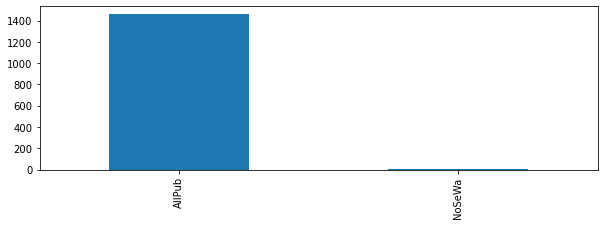

In [21]:
object_columns_house['Utilities'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_house['Utilities'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

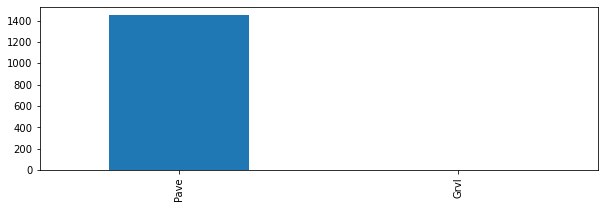

In [22]:
object_columns_house['Street'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_house['Street'].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

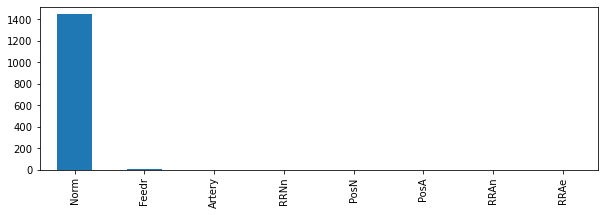

In [23]:
object_columns_house['Condition2'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_house['Condition2'].value_counts()

In [24]:
numerical_columns_house['Age_House'] = numerical_columns_house['YrSold']-numerical_columns_house['YearBuilt']
numerical_columns_house['Age_House'].describe()

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: Age_House, dtype: float64

In [28]:
numerical_columns_house['TotalBsmBath'] = numerical_columns_house['BsmtFullBath'] + numerical_columns_house['BsmtFullBath']*0.5
numerical_columns_house['TotalBath'] = numerical_columns_house['FullBath'] + numerical_columns_house['HalfBath']*0.5 
numerical_columns_house['TotalSA']=numerical_columns_house['TotalBsmtSF'] + numerical_columns_house['1stFlrSF'] + numerical_columns_house['2ndFlrSF']

In [30]:
numerical_columns_house.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_House,TotalBsmBath,TotalBath,TotalSA
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,2,2008,208500,5,1.5,2.5,2566
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,5,2007,181500,31,0.0,2.0,2524
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,9,2008,223500,7,1.5,2.5,2706
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,2,2006,140000,91,1.5,1.0,2473
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,12,2008,250000,8,1.5,2.5,3343


### Ordinal categories features - Mapping from 0 to N

In [32]:
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }
object_columns_house['ExterQual'] = object_columns_house['ExterQual'].map(bin_map)
object_columns_house['ExterCond'] = object_columns_house['ExterCond'].map(bin_map)
object_columns_house['BsmtCond'] = object_columns_house['BsmtCond'].map(bin_map)
object_columns_house['BsmtQual'] = object_columns_house['BsmtQual'].map(bin_map)
object_columns_house['HeatingQC'] = object_columns_house['HeatingQC'].map(bin_map)
object_columns_house['KitchenQual'] = object_columns_house['KitchenQual'].map(bin_map)
object_columns_house['FireplaceQu'] = object_columns_house['FireplaceQu'].map(bin_map)
object_columns_house['GarageQual'] = object_columns_house['GarageQual'].map(bin_map)
object_columns_house['GarageCond'] = object_columns_house['GarageCond'].map(bin_map)
object_columns_house['CentralAir'] = object_columns_house['CentralAir'].map(bin_map)
object_columns_house['LotShape'] = object_columns_house['LotShape'].map(bin_map)
object_columns_house['BsmtExposure'] = object_columns_house['BsmtExposure'].map(bin_map)
object_columns_house['BsmtFinType1'] = object_columns_house['BsmtFinType1'].map(bin_map)
object_columns_house['BsmtFinType2'] = object_columns_house['BsmtFinType2'].map(bin_map)

PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
object_columns_house['PavedDrive'] = object_columns_house['PavedDrive'].map(PavedDrive)

In [33]:
#Select categorical features
rest_object_columns = object_columns_house.select_dtypes(include=['object'])
#Using One hot encoder
object_columns_house = pd.get_dummies(object_columns_house, columns=rest_object_columns.columns) 

In [34]:
object_columns_house.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,4,2,4,2,2,6,1,4,1,...,0,0,0,1,0,0,0,0,1,0
1,3,2,2,4,2,4,5,1,4,1,...,0,0,0,1,0,0,0,0,1,0
2,2,4,2,4,2,2,6,1,4,1,...,0,0,0,1,0,0,0,0,1,0
3,2,2,2,2,4,2,5,1,4,1,...,0,0,0,1,1,0,0,0,0,0
4,2,4,2,4,2,3,6,1,4,1,...,0,0,0,1,0,0,0,0,1,0


In [35]:
house_final = pd.concat([object_columns_house, numerical_columns_house], axis=1,sort=False)
house_final.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_House,TotalBsmBath,TotalBath,TotalSA
0,3,4,2,4,2,2,6,1,4,1,...,0,0,0,2,2008,208500,5,1.5,2.5,2566
1,3,2,2,4,2,4,5,1,4,1,...,0,0,0,5,2007,181500,31,0.0,2.0,2524
2,2,4,2,4,2,2,6,1,4,1,...,0,0,0,9,2008,223500,7,1.5,2.5,2706
3,2,2,2,2,4,2,5,1,4,1,...,0,0,0,2,2006,140000,91,1.5,1.0,2473
4,2,4,2,4,2,3,6,1,4,1,...,0,0,0,12,2008,250000,8,1.5,2.5,3343


In [48]:
house_train = house_final.drop(['SalePrice'],axis=1)
target= house_final['SalePrice']

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(house_train,target,test_size=0.2,random_state=0)

In [50]:
xgb = XGBRegressor()

In [51]:
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [57]:
#Accuracy score on trainingdata
X_train_prediction = xgb.predict(X_train)
